<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot


## Function

In [3]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [4]:
#Load dataset breast cancer
data = load_breast_cancer()

In [5]:
# Transform into pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

In [6]:
# Univariate analysis
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


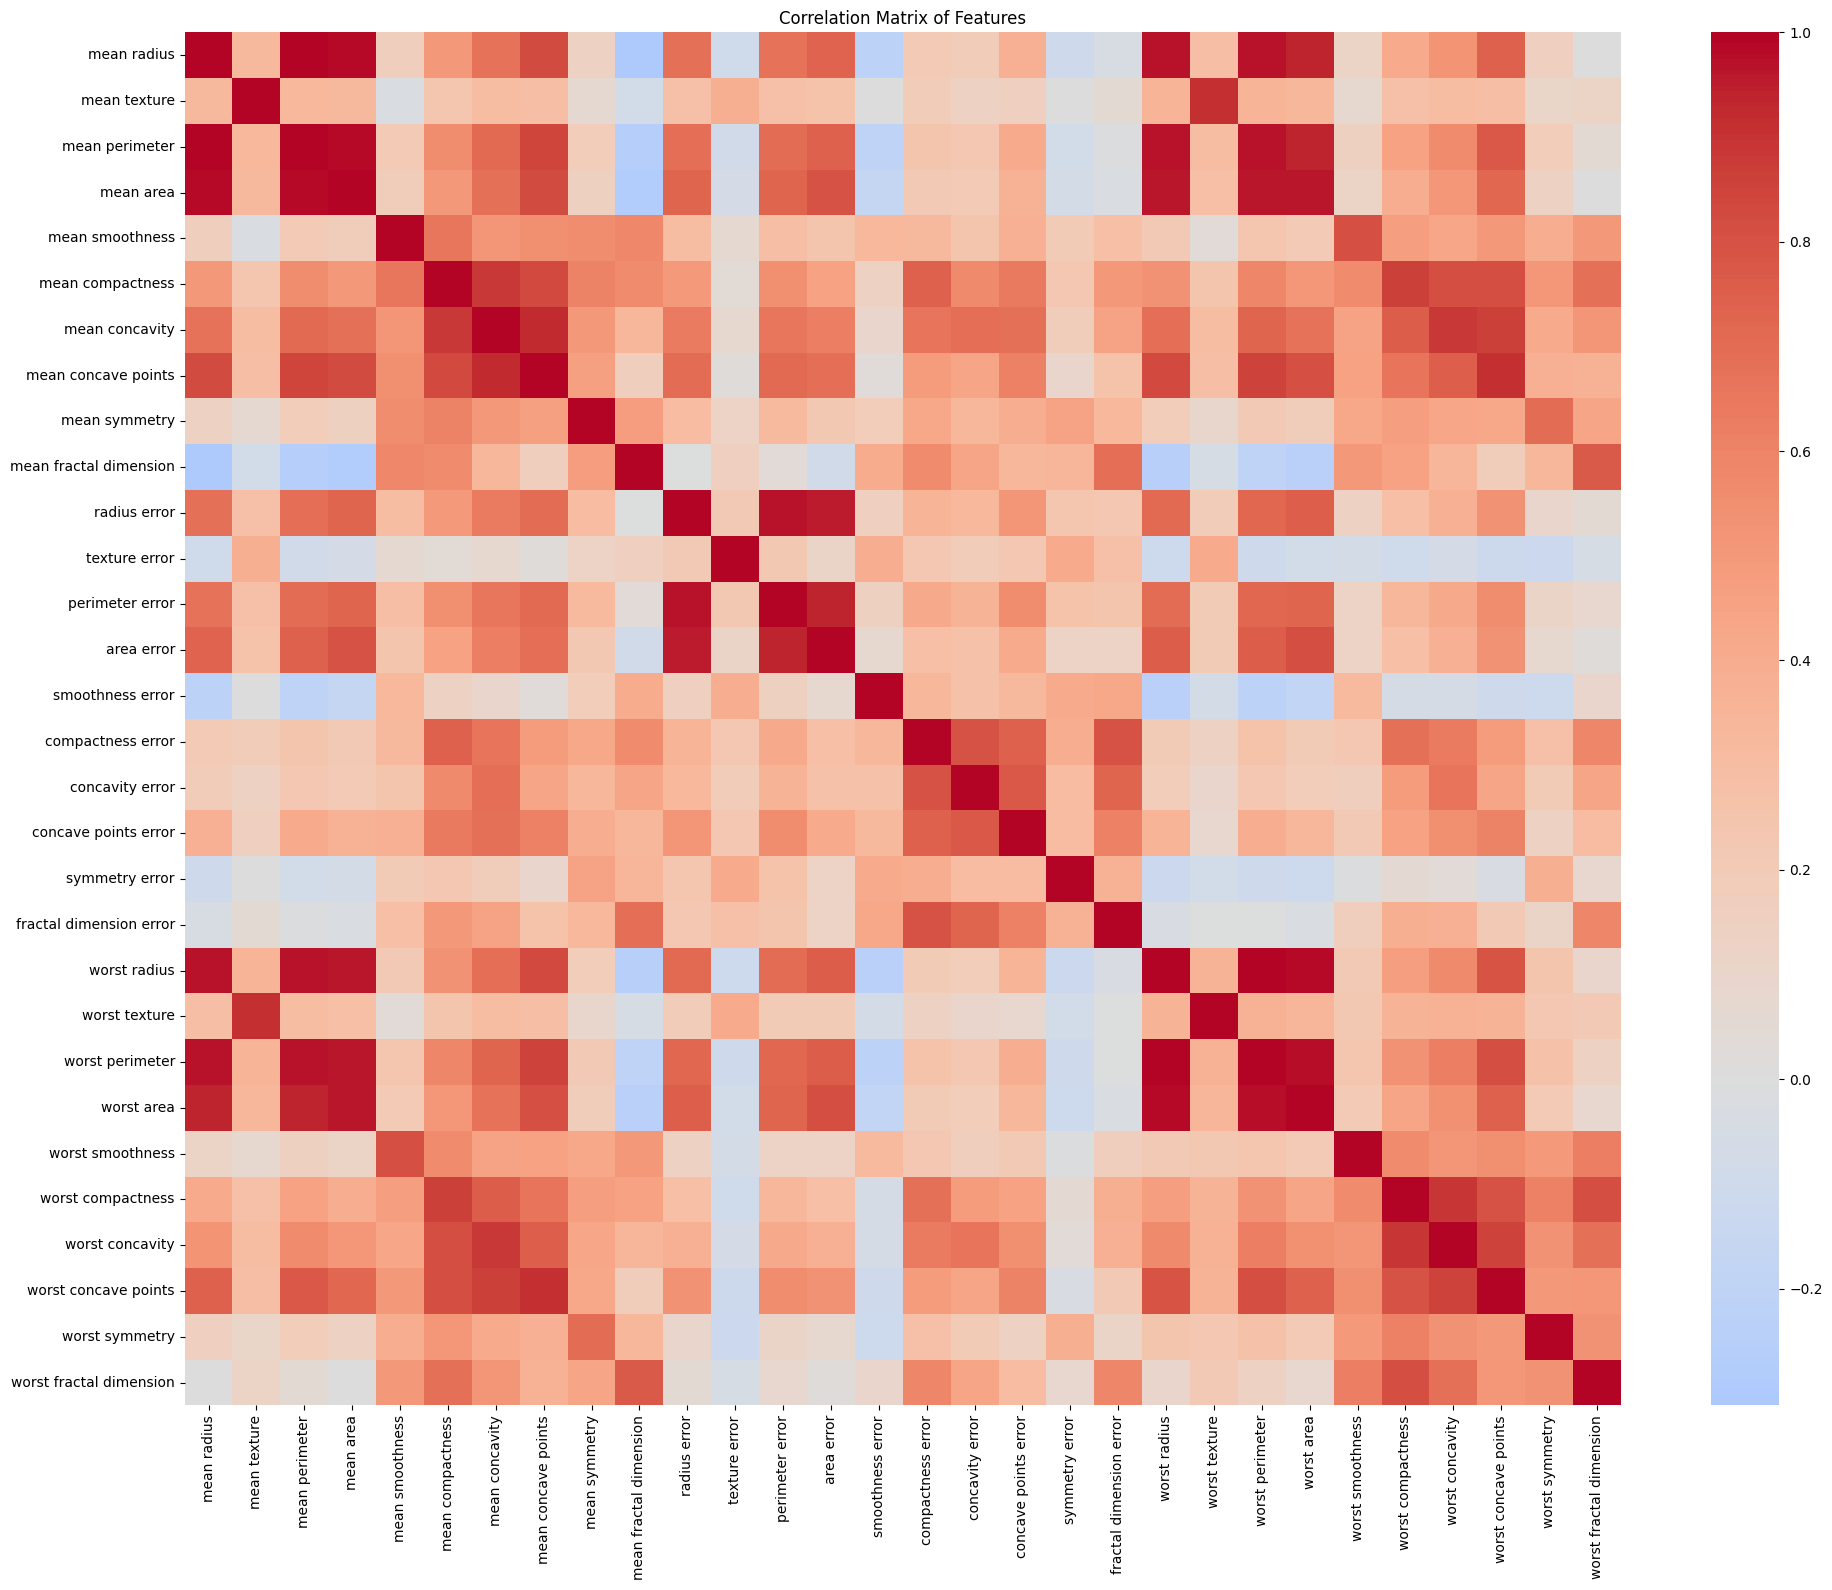

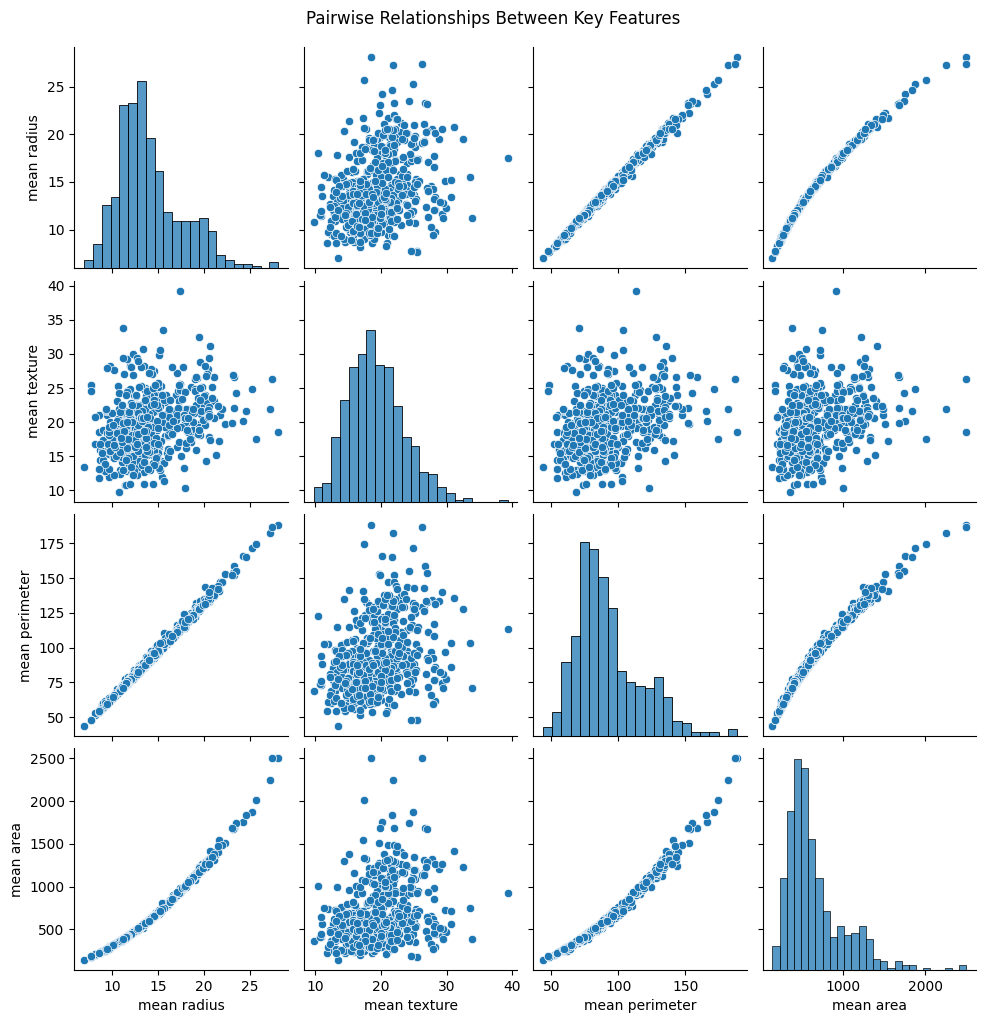

In [8]:
# Bivariate analysis 

# Create correlation matrix heatmap
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

# Create pairplot for a few key features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
sns.pairplot(df[features_to_plot])
plt.suptitle('Pairwise Relationships Between Key Features', y=1.02)
plt.show()

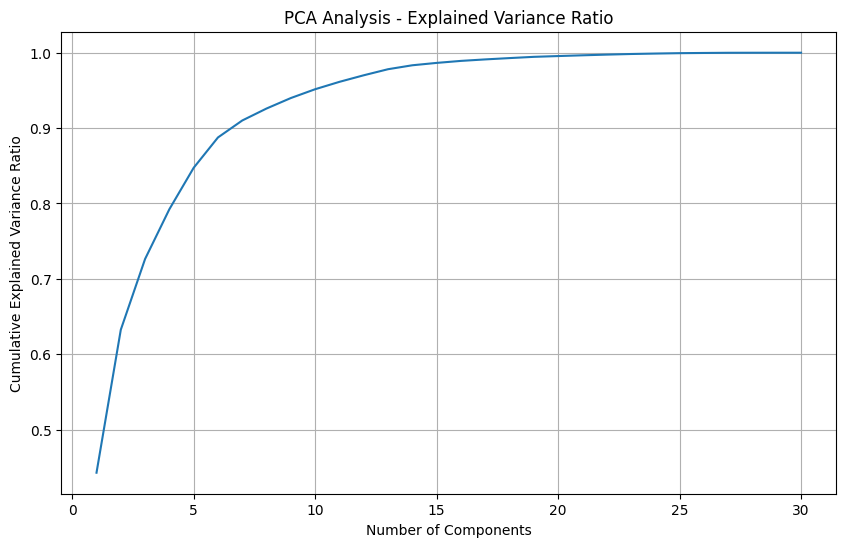

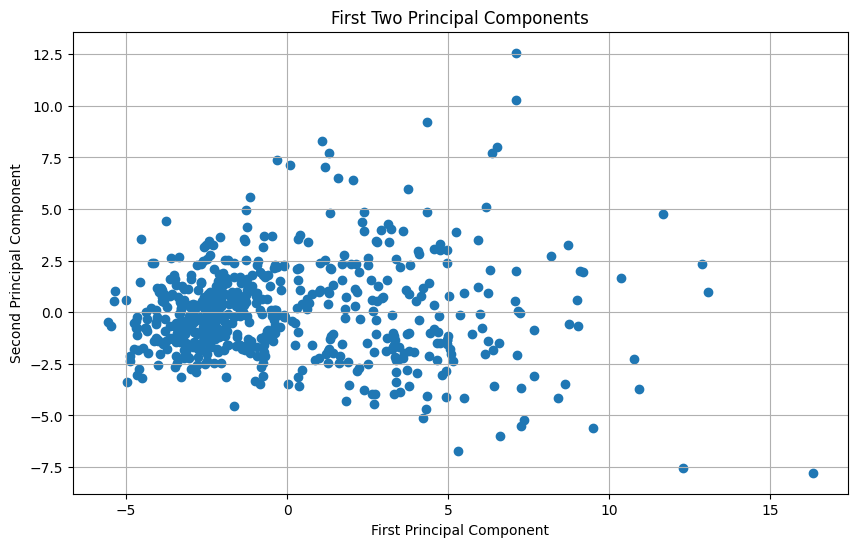

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Multivariate analysis
# Perform PCA for multivariate analysis

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Analysis - Explained Variance Ratio')
plt.grid(True)
plt.show()

# Plot first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components')
plt.grid(True)
plt.show()

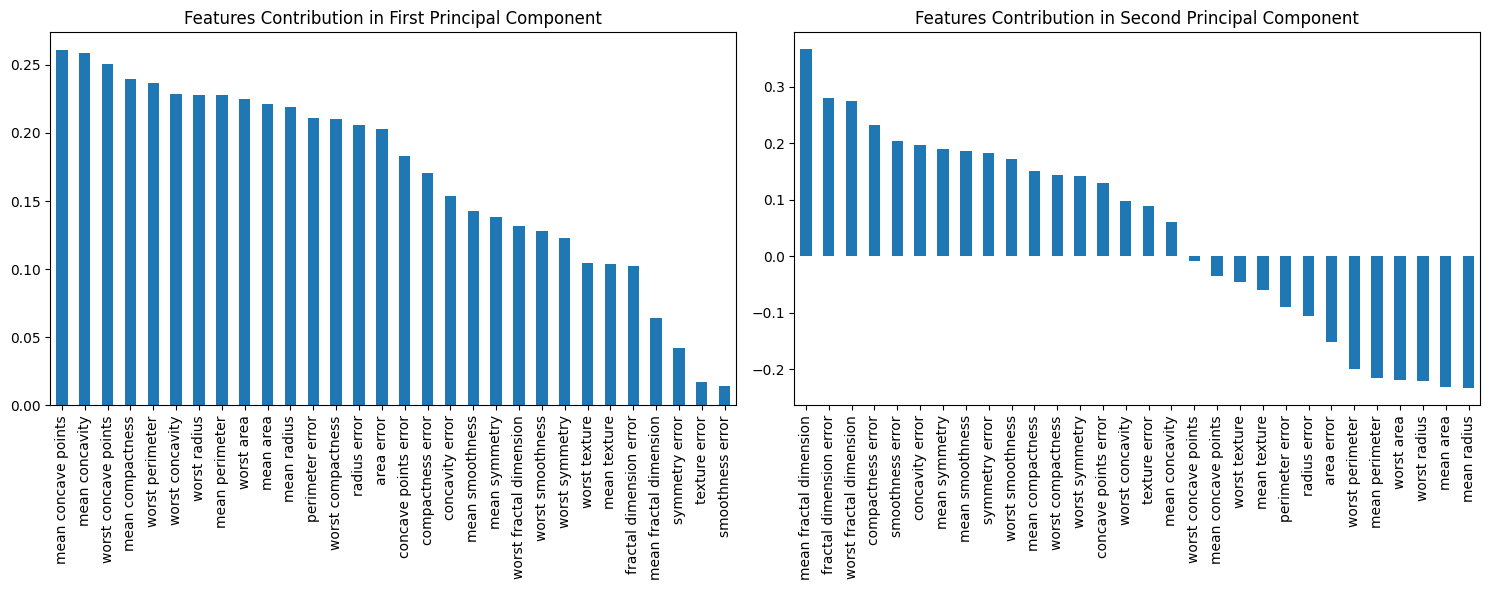


Variance explained ratio:
First component: 0.443
Second component: 0.190
Total variance explained: 0.632


In [11]:
# Get the feature importance from PCA
pca_components = pd.DataFrame(
    pca.components_,
    columns=df.columns
)

# Plot feature importance for first two components
plt.figure(figsize=(15, 6))

# First principal component
plt.subplot(1, 2, 1)
pca_components.iloc[0].sort_values(ascending=False).plot(kind='bar')
plt.title('Features Contribution in First Principal Component')
plt.xticks(rotation=90)

# Second principal component
plt.subplot(1, 2, 2)
pca_components.iloc[1].sort_values(ascending=False).plot(kind='bar')
plt.title('Features Contribution in Second Principal Component')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Print variance explained ratio
print("\nVariance explained ratio:")
print(f"First component: {pca.explained_variance_ratio_[0]:.3f}")
print(f"Second component: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_[:2]):.3f}")

#### 3) Recoder les variables si nécessaire


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

In [13]:
# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features with high correlation
df_reduced = df.drop(columns=to_drop)

print(f"Selected features: {df_reduced.columns.tolist()}")

Selected features: ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'smoothness error', 'compactness error', 'concave points error', 'symmetry error', 'worst symmetry']


In [15]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean smoothness         569 non-null    float64
 3   mean compactness        569 non-null    float64
 4   mean symmetry           569 non-null    float64
 5   mean fractal dimension  569 non-null    float64
 6   radius error            569 non-null    float64
 7   texture error           569 non-null    float64
 8   smoothness error        569 non-null    float64
 9   compactness error       569 non-null    float64
 10  concave points error    569 non-null    float64
 11  symmetry error          569 non-null    float64
 12  worst symmetry          569 non-null    float64
dtypes: float64(13)
memory usage: 57.9 KB


## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = df_reduced
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
sgd = SGDClassifier(random_state=42)
svc = SVC(random_state=42)
lr = LogisticRegression(random_state=42)

# Fit the models
sgd.fit(X_train, y_train)
svc.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Print initial scores
print("Initial scores:")
print(f"SGDClassifier: {sgd.score(X_test, y_test):.3f}")
print(f"SVC: {svc.score(X_test, y_test):.3f}")
print(f"LogisticRegression: {lr.score(X_test, y_test):.3f}")

Initial scores:
SGDClassifier: 0.746
SVC: 0.904
LogisticRegression: 0.921


#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with f

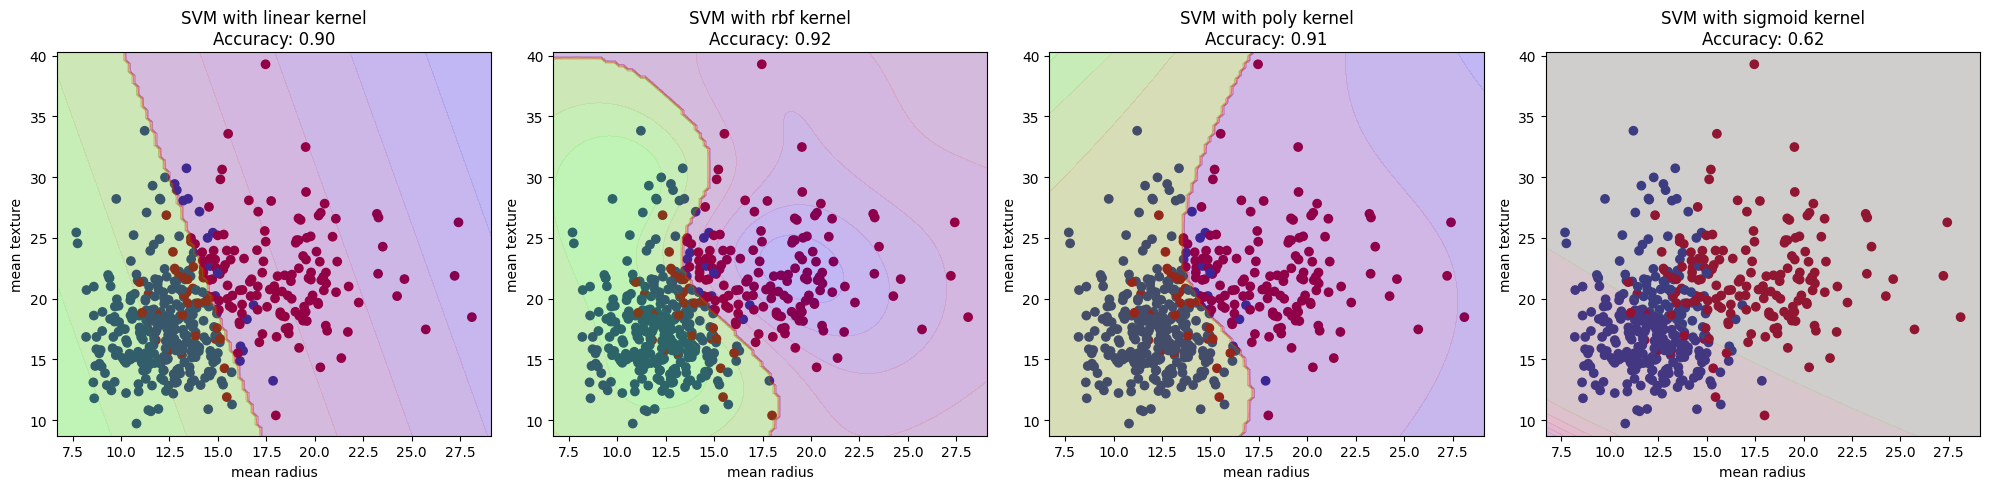

In [17]:
# Select two features for visualization
X_2d = df[['mean radius', 'mean texture']]  # Using the most basic features
X_2d_train, X_2d_test, y_2d_train, y_2d_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Create and train SVMs with different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
plt.figure(figsize=(20, 5))

for i, kernel in enumerate(kernels, 1):
    # Train SVM
    svc = SVC(kernel=kernel, random_state=42)
    svc.fit(X_2d_train, y_2d_train)
    
    # Plot
    plt.subplot(1, 4, i)
    plt.scatter(X_2d_train['mean radius'], X_2d_train['mean texture'], c=y_2d_train, cmap='RdYlBu')
    
    # Get axes limits for plot_predictions
    axes = [
        X_2d_train['mean radius'].min() - 1,
        X_2d_train['mean radius'].max() + 1,
        X_2d_train['mean texture'].min() - 1,
        X_2d_train['mean texture'].max() + 1
    ]
    
    # Plot decision boundary
    plot_predictions(svc, axes)
    
    plt.title(f'SVM with {kernel} kernel\nAccuracy: {svc.score(X_2d_test, y_2d_test):.2f}')
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')

plt.tight_layout()
plt.show()

In [ ]:
#plt.scatter(<col_1>, <col_2>, c=<target>)
#plot_predictions(clf, axes)
#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

In [18]:
# Train and evaluate models with different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

for kernel in kernels:
    # Train SVM with current kernel
    svc = SVC(kernel=kernel, random_state=42)
    svc.fit(X_train, y_train)
    
    # Get predictions and scores
    train_score = svc.score(X_train, y_train)
    test_score = svc.score(X_test, y_test)
    y_pred = svc.predict(X_test)
    
    # Store results
    results[kernel] = {
        'train_score': train_score,
        'test_score': test_score,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    # Print results
    print(f"\nResults for SVM with {kernel} kernel:")
    print(f"Training accuracy: {train_score:.3f}")
    print(f"Testing accuracy: {test_score:.3f}")
    print("\nConfusion Matrix:")
    print(results[kernel]['confusion_matrix'])
    print("\nClassification Report:")
    print(results[kernel]['classification_report'])
    print("-"*70)


Results for SVM with linear kernel:
Training accuracy: 0.930
Testing accuracy: 0.930

Confusion Matrix:
[[38  5]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

----------------------------------------------------------------------

Results for SVM with rbf kernel:
Training accuracy: 0.899
Testing accuracy: 0.904

Confusion Matrix:
[[35  8]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        43
           1       0.89      0.96      0.93        71

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.89       114
weighted avg       0.90      0.90    

#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 


SGD:
CV Accuracy: 0.861 (+/- 0.080)

SVC-linear:
CV Accuracy: 0.917 (+/- 0.045)

SVC-rbf:
CV Accuracy: 0.881 (+/- 0.065)

SVC-poly:
CV Accuracy: 0.895 (+/- 0.071)

LogisticRegression:
CV Accuracy: 0.902 (+/- 0.051)


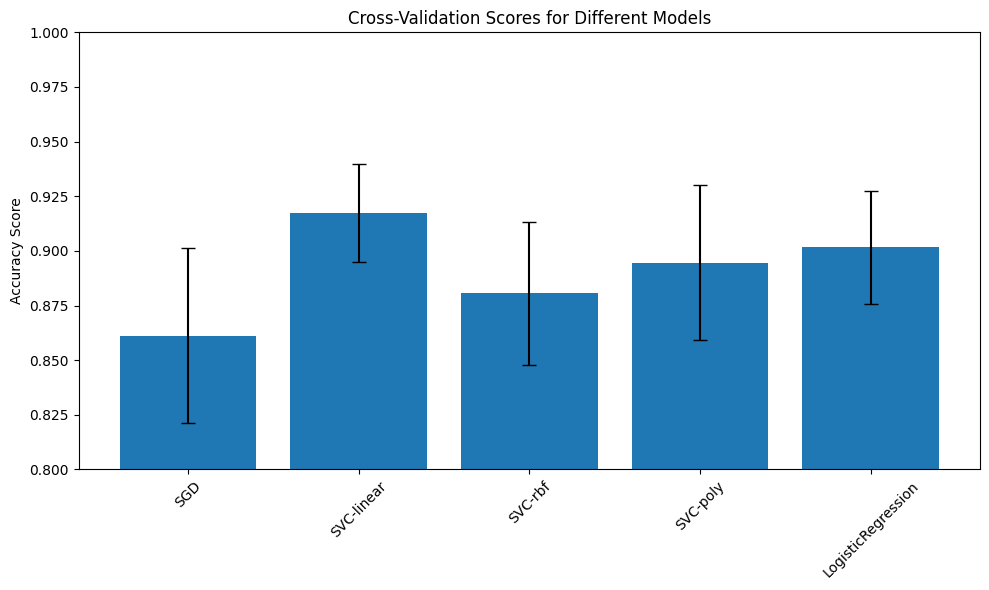

In [19]:
# Perform cross-validation for each model
models = {
    'SGD': SGDClassifier(random_state=42),
    'SVC-linear': SVC(kernel='linear', random_state=42),
    'SVC-rbf': SVC(kernel='rbf', random_state=42),
    'SVC-poly': SVC(kernel='poly', random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Dictionary to store results
cv_results = {}

# Perform 5-fold cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = {
        'mean_score': cv_scores.mean(),
        'std_score': cv_scores.std(),
        'scores': cv_scores
    }
    print(f"\n{name}:")
    print(f"CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
# Plot the cross-validation results
plt.figure(figsize=(10, 6))
names = list(cv_results.keys())
scores = [cv_results[name]['mean_score'] for name in names]
std = [cv_results[name]['std_score'] for name in names]

plt.bar(names, scores, yerr=std, capsize=5)
plt.title('Cross-Validation Scores for Different Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # Adjust y-axis for better visualization
plt.tight_layout()
plt.show()

#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation score: 0.9472527472527472

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



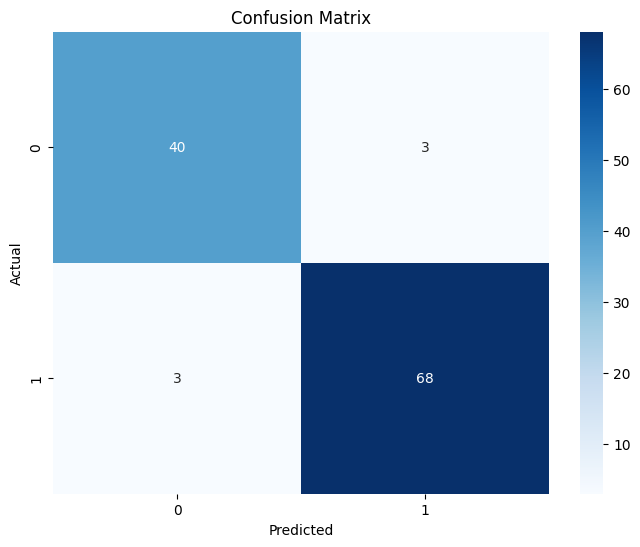

In [22]:
# Define parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'poly']
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>